# Climate policy widget mock-ups

In [57]:
#import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:
policy_data = pd.read_csv('../../datasets/Policy_data.csv')
metadata_policy = {'ISO':policy_data.columns[0] , 'Country':policy_data.columns[1], 'NDC_Blurb':policy_data.columns[2], 'Climate_vulnerability':policy_data.columns[3],
                    'Avoided_loss':policy_data.columns[4], 'Annual_opportunity':policy_data.columns[5]}
policy_data.columns = ['ISO', 'Country', 'NDC_Blurb', 'Climate_vulnerability', 'Avoided_loss', 'Annual_opportunity']
policy_data


,ISO,Country,NDC_Blurb,Climate_vulnerability,Avoided_loss,Annual_opportunity
0,AGO,Angola,"""Angola plans to reduce GHG emissions up to 35...",106.67,0.24,0.013613
1,ATG,Antigua & Barbuda,"Conditional Adaptation Targets "" (1) By 2025, ...",74.50,0.00,0.000332
2,AUS,Australia,"""Under a Paris Agreement applicable to all, Au...",52.00,0.77,0.789309
3,BHR,Bahrain,The Kingdom of Bahrain communicated in its NDC...,125.00,0.00,0.000003
4,BGD,Bangladesh,"""The NDC of Bangladesh consists of the followi...",25.00,0.08,0.323811
...,...,...,...,...,...,...
96,VUT,Vanuatu,"""The mitigation contribution for the Vanuatu N...",54.67,0.00,0.000233
97,VEN,Venezuela,Venezuela intends to implement a National Miti...,67.50,0.97,0.282058
98,VNM,Vietnam,"""With domestic resources, by 2030 Viet Nam wil...",31.33,0.65,0.408448
99,VGB,"Virgin Islands, British",NaN,NaN,0.00,0.000011


In [3]:
metadata_policy

{'ISO': 'iso',
 'Country': 'name',
 'NDC_Blurb': 'NDC Blurb',
 'Climate_vulnerability': 'Climate Vulnerability Rank (index)',
 'Avoided_loss': 'Avoided loss (Emissions from Mangrove loss) (MtCO2e yr-1)',
 'Annual_opportunity': 'Annual Opportunity from Restoration (MtCO2e yr-1)'}

In [4]:
emissions = pd.read_csv('../../datasets/Emissions.csv')
metaadata_emissions = {'Country':emissions.columns[0],'ISO':emissions.columns[1], 'Process':emissions.columns[2], 'Emissions':emissions.columns[3]}
emissions.columns = ['Country','ISO', 'Process', 'Emissions']
emissions

,Country,ISO,Process,Emissions
0,Angola,AGO,LUC-Crops,141.218004
1,Angola,AGO,LUC-Pasture,16.072787
2,Angola,AGO,Wood Harvest,9.329425
3,Angola,AGO,Fertilizer,0.067510
4,Angola,AGO,Enteric Ferm.,5.481993
...,...,...,...,...
1282,Zimbabwe,ZWE,Manure-Pasture,3.058157
1283,Zimbabwe,ZWE,Residues,0.128225
1284,Zimbabwe,ZWE,Burning,0.169136
1285,Zimbabwe,ZWE,Peatland,0.000000


In [32]:
test_emissions = emissions[emissions['Country'] == 'Indonesia'].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]
test_emissions

,Country,ISO,Emissions
Process,,,
LUC-Crops,Indonesia,IDN,1049.824130
LUC-Pasture,Indonesia,IDN,2.081840
Wood Harvest,Indonesia,IDN,120.806335
Fertilizer,Indonesia,IDN,15.411961
Enteric Ferm.,Indonesia,IDN,29.005775
Manure Management,Indonesia,IDN,7.264015
Rice,Indonesia,IDN,91.263859
Manure-Soil,Indonesia,IDN,3.471890
Manure-Pasture,Indonesia,IDN,8.195982


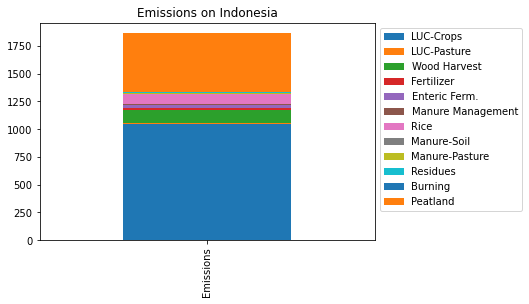

In [14]:
pd.DataFrame(test_emissions['Emissions']).T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Emissions on Indonesia')
plt.show()

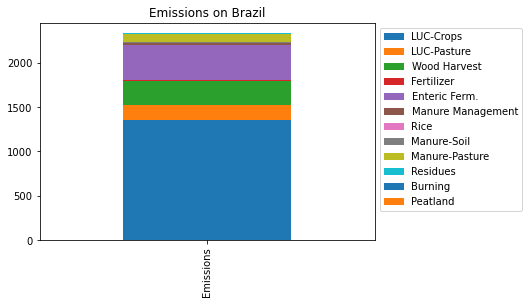

In [15]:
test_emissions = emissions[emissions['Country'] == 'Brazil'].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]
pd.DataFrame(test_emissions['Emissions']).T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Emissions on Brazil')
plt.show()

In [44]:
country='Indonesia'
test_emissions = emissions[emissions['Country'] == country].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]

test_policy = policy_data[policy_data['Country'] == country][['Avoided_loss', 'Annual_opportunity']]
test_policy

,Avoided_loss,Annual_opportunity
40,34.3,4.379141


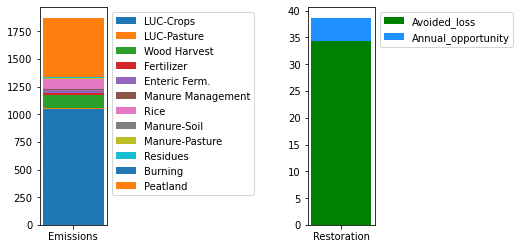

In [71]:
plt.subplot(1,2,1)
bot = 0
rect = Rectangle((0, 0),0, 100)
for p in test_emissions.index:
    #print(f'{p} is {test_emissions.loc[p, "Emissions"]}')
    plt.bar('Emissions',test_emissions.loc[p, "Emissions"], bottom = bot) 
    plt.ylim(0, test_emissions['Emissions'].sum()+100)
    plt.legend(test_emissions.index, bbox_to_anchor=(1,1), loc="upper left")
    bot=bot+test_emissions.loc[p, "Emissions"]
    #plt.add_patch(rect)   
    
plt.subplot(1,2,2)
plt.bar('Restoration', test_policy['Avoided_loss'], color = 'green')
plt.bar('Restoration', test_policy['Annual_opportunity'],color = 'dodgerblue', bottom = test_policy['Avoided_loss']+0.01)
plt.legend(['Avoided_loss', 'Annual_opportunity'], bbox_to_anchor=(1,1), loc="upper left")

plt.subplots_adjust(wspace=3)


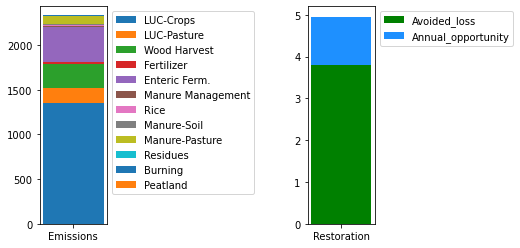

In [72]:
country='Brazil'
test_emissions = emissions[emissions['Country'] == country].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]

test_policy = policy_data[policy_data['Country'] == country][['Avoided_loss', 'Annual_opportunity']]

plt.subplot(1,2,1)
bot = 0
rect = Rectangle((0, 0),0, 100)
for p in test_emissions.index:
    #print(f'{p} is {test_emissions.loc[p, "Emissions"]}')
    plt.bar('Emissions',test_emissions.loc[p, "Emissions"], bottom = bot) 
    plt.ylim(0, test_emissions['Emissions'].sum()+100)
    plt.legend(test_emissions.index, bbox_to_anchor=(1,1), loc="upper left")
    bot=bot+test_emissions.loc[p, "Emissions"]
    #plt.add_patch(rect)   
    
plt.subplot(1,2,2)
plt.bar('Restoration', test_policy['Avoided_loss'], color = 'green')
plt.bar('Restoration', test_policy['Annual_opportunity'],color = 'dodgerblue', bottom = test_policy['Avoided_loss']+0.01)
plt.legend(['Avoided_loss', 'Annual_opportunity'], bbox_to_anchor=(1,1), loc="upper left")

plt.subplots_adjust(wspace=3)